In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import xgboost as xgb
from xgboost import plot_importance
from xgboost import to_graphviz
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import plot_confusion_matrix, classification_report, plot_roc_curve

In [2]:
df = pd.read_csv("Heart.csv")

In [3]:
df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         299 non-null    float64
 12  Thal       301 non-null    object 
 13  AHD        303 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 33.3+ KB


In [5]:
df.shape

(303, 14)

In [6]:
df.describe()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241
std,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


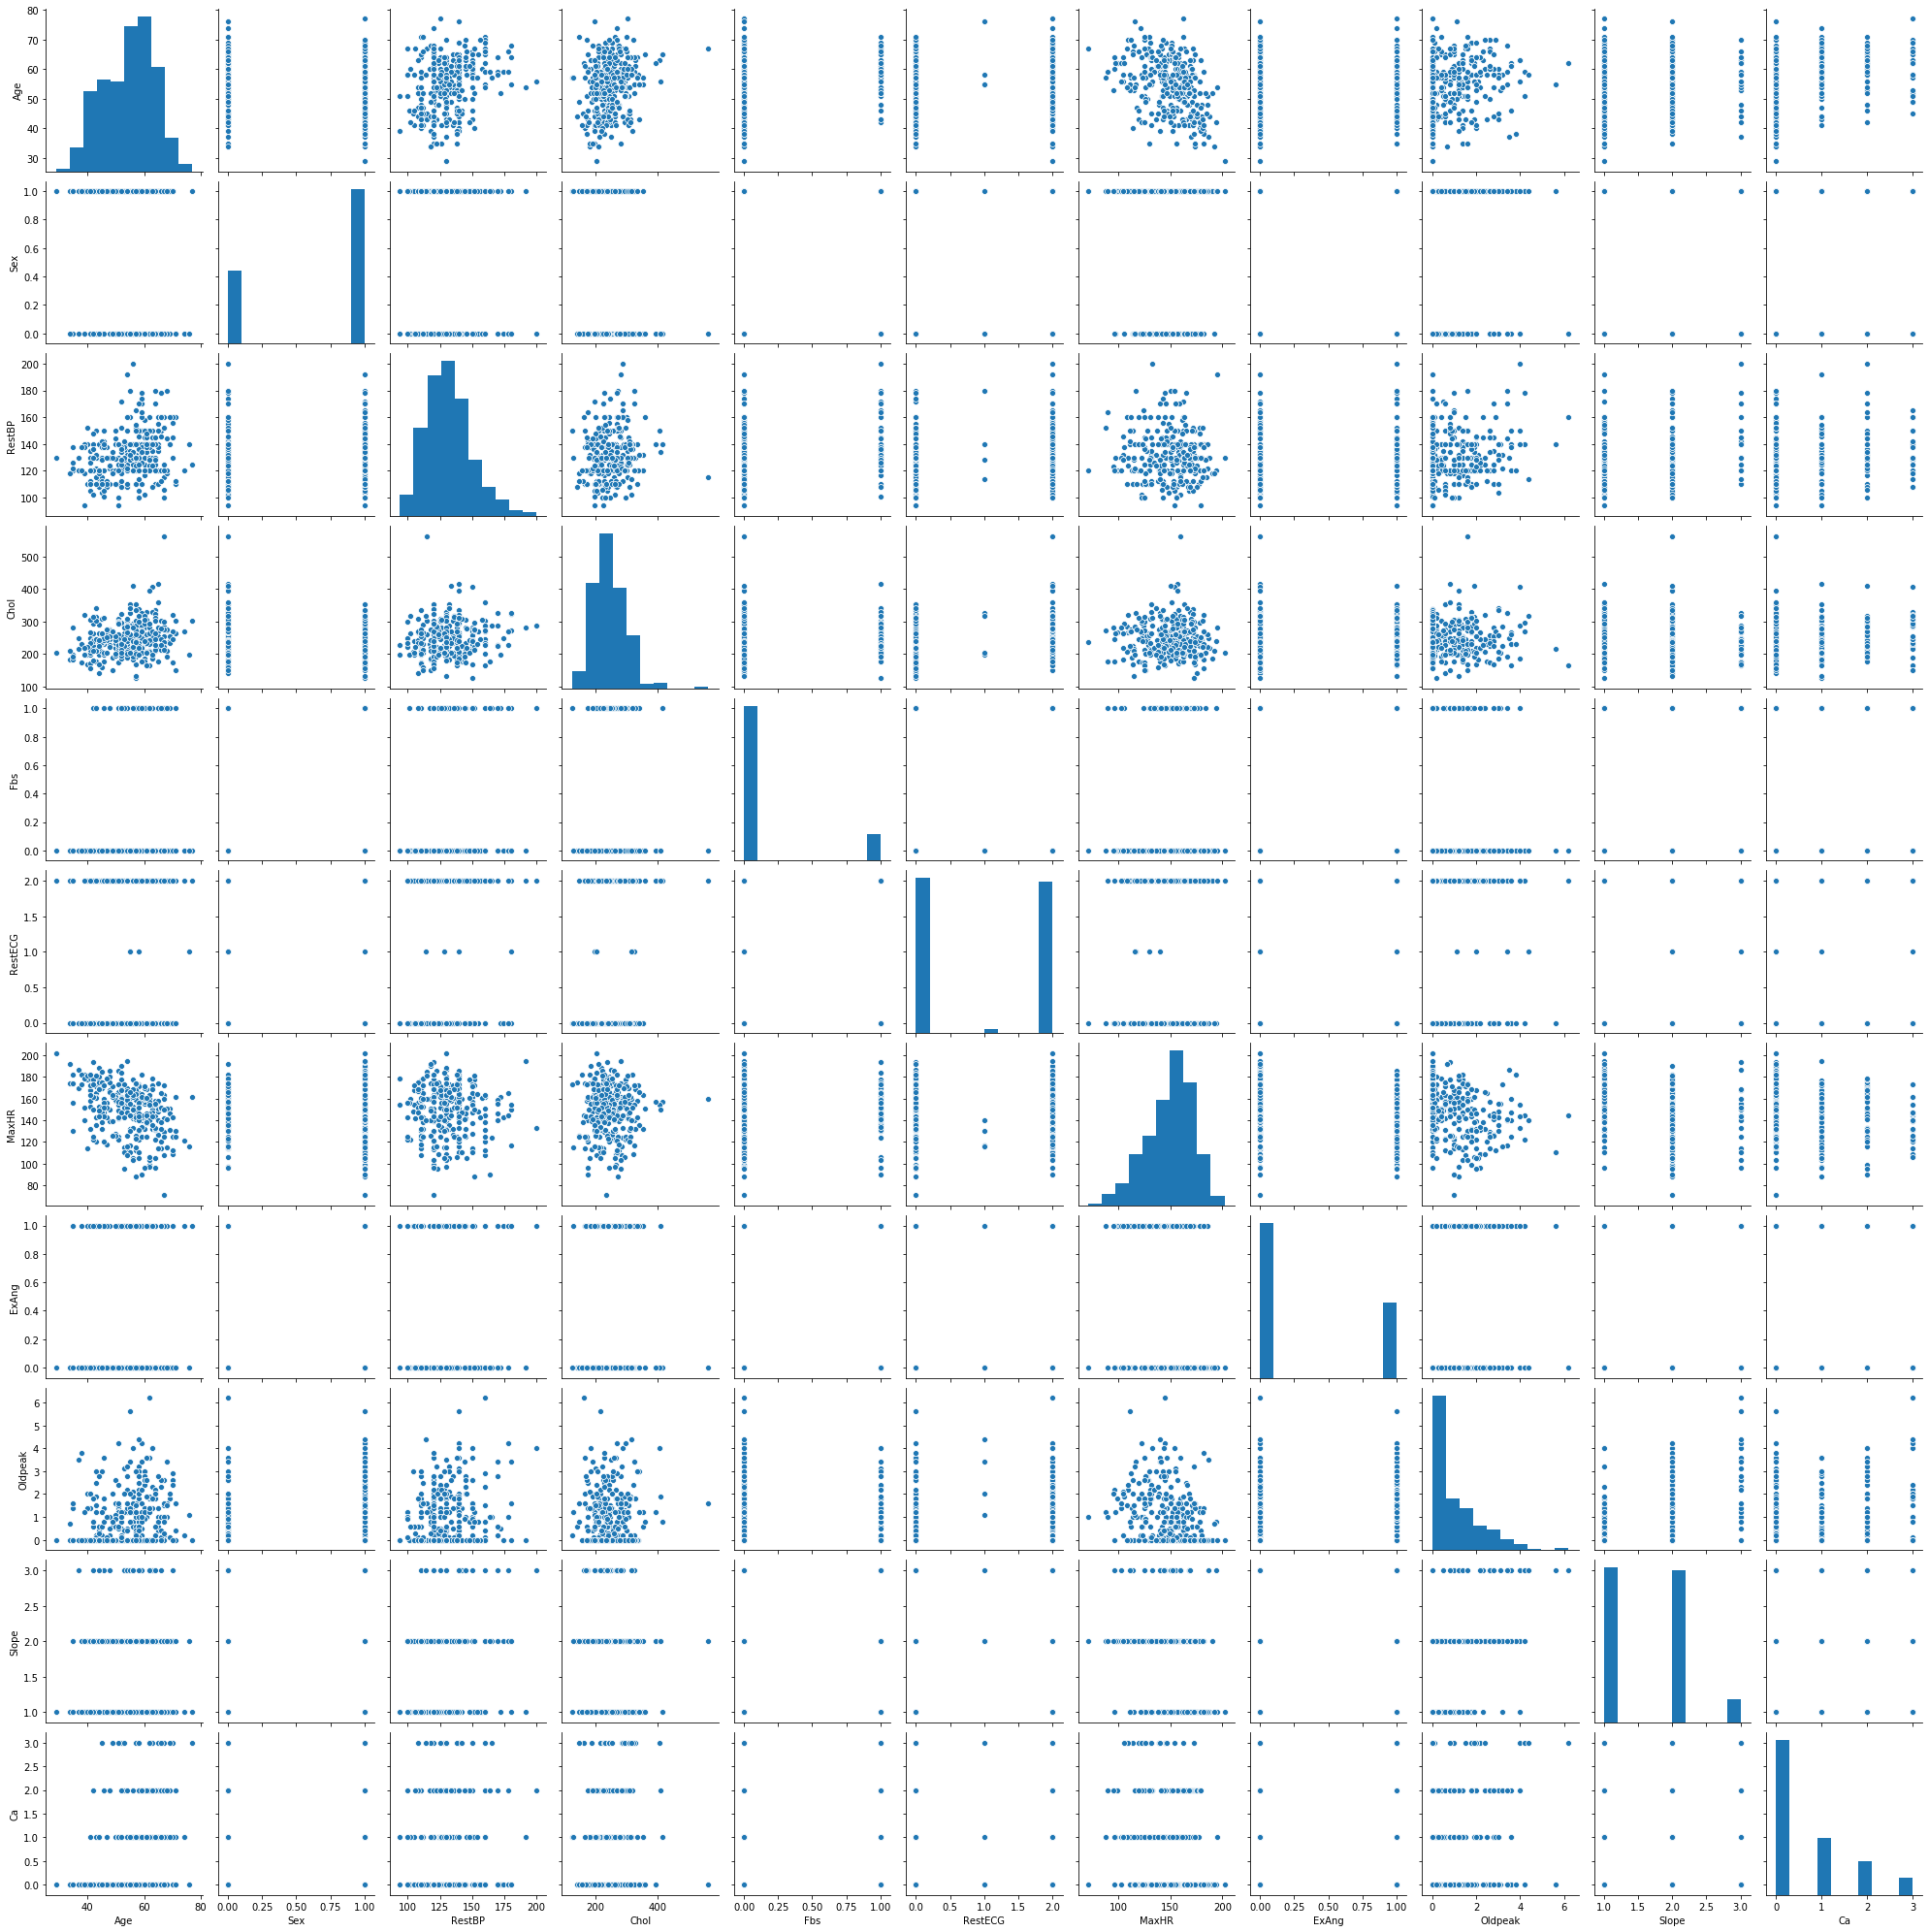

In [7]:
sns.pairplot(df)
plt.show()

In [8]:
df.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64

In [9]:
df['Ca'].value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
Name: Ca, dtype: int64

In [10]:
df['Ca'].fillna(value=0.0,inplace=True)

In [11]:
df['Thal'].value_counts()

normal        166
reversable    117
fixed          18
Name: Thal, dtype: int64

In [12]:
df['ChestPain'].value_counts()

asymptomatic    144
nonanginal       86
nontypical       50
typical          23
Name: ChestPain, dtype: int64

In [13]:
labelencoder = LabelEncoder()

In [14]:
df['AHD'] = labelencoder.fit_transform(df.AHD)

In [15]:
df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,0
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,1
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,1
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,0
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,1
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,1
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,1
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,1


In [16]:
df.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         2
AHD          0
dtype: int64

In [17]:
df.dropna(inplace=True)

In [18]:
df.shape

(301, 14)

In [19]:
df.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         0
AHD          0
dtype: int64

In [20]:
df.corr()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,AHD
Age,1.000000,-0.098138,0.284734,0.208287,0.121670,0.149037,-0.395982,0.092985,0.203604,0.162228,0.364981,0.224394
Sex,-0.098138,1.000000,-0.065284,-0.202126,0.041025,0.029016,-0.057065,0.140802,0.098482,0.031571,0.084732,0.272006
RestBP,0.284734,-0.065284,1.000000,0.129371,0.178498,0.147089,-0.046402,0.065564,0.188801,0.117437,0.096713,0.151471
Chol,0.208287,-0.202126,0.129371,1.000000,0.015762,0.171185,-0.005690,0.064250,0.044836,-0.004228,0.120782,0.086762
Fbs,0.121670,0.041025,0.178498,0.015762,1.000000,0.079892,-0.012297,0.013534,0.004855,0.054079,0.147124,0.015613
RestECG,0.149037,0.029016,0.147089,0.171185,0.079892,1.000000,-0.077950,0.092626,0.117580,0.140144,0.132462,0.177049
MaxHR,-0.395982,-0.057065,-0.046402,-0.005690,-0.012297,-0.077950,1.000000,-0.386043,-0.349391,-0.393527,-0.270133,-0.425870
ExAng,0.092985,0.140802,0.065564,0.064250,0.013534,0.092626,-0.386043,1.000000,0.287926,0.254076,0.148407,0.427860
Oldpeak,0.203604,0.098482,0.188801,0.044836,0.004855,0.117580,-0.349391,0.287926,1.000000,0.576795,0.299771,0.423894
Slope,0.162228,0.031571,0.117437,-0.004228,0.054079,0.140144,-0.393527,0.254076,0.576795,1.000000,0.110467,0.335806


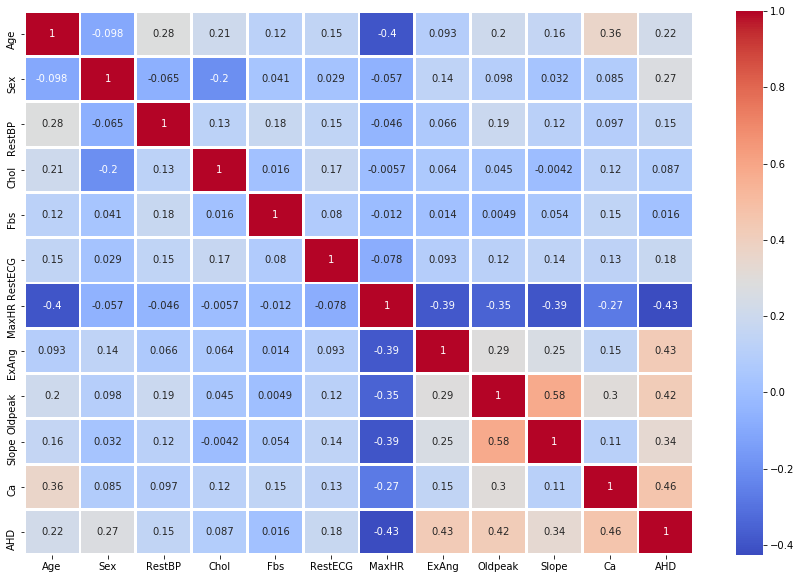

In [21]:
plt.figure(figsize=(15,10))
sns.heatmap(data=df.corr(),cmap="coolwarm",annot=True,fmt='.2g',linewidths=2)
plt.show()

In [22]:
dummies = pd.get_dummies(df[['ChestPain','Thal']],drop_first=True)

In [23]:
dummies

,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_normal,Thal_reversable
0,0,0,1,0,0
1,0,0,0,1,0
2,0,0,0,0,1
3,1,0,0,1,0
4,0,1,0,1,0
...,...,...,...,...,...
298,0,0,1,0,1
299,0,0,0,0,1
300,0,0,0,0,1
301,0,1,0,1,0


In [24]:
df2 = pd.concat([dummies,df],axis=1)

In [25]:
df2

,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_normal,Thal_reversable,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,0,0,1,0,0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,0
1,0,0,0,1,0,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,1
2,0,0,0,0,1,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,1
3,1,0,0,1,0,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,0
4,0,1,0,1,0,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0,0,1,0,1,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,1
299,0,0,0,0,1,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,1
300,0,0,0,0,1,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,1
301,0,1,0,1,0,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,1


In [26]:
df2 = df2.drop(['ChestPain','Thal'],axis=1)

In [27]:
df2

,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_normal,Thal_reversable,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,AHD
0,0,0,1,0,0,63,1,145,233,1,2,150,0,2.3,3,0.0,0
1,0,0,0,1,0,67,1,160,286,0,2,108,1,1.5,2,3.0,1
2,0,0,0,0,1,67,1,120,229,0,2,129,1,2.6,2,2.0,1
3,1,0,0,1,0,37,1,130,250,0,0,187,0,3.5,3,0.0,0
4,0,1,0,1,0,41,0,130,204,0,2,172,0,1.4,1,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0,0,1,0,1,45,1,110,264,0,0,132,0,1.2,2,0.0,1
299,0,0,0,0,1,68,1,144,193,1,0,141,0,3.4,2,2.0,1
300,0,0,0,0,1,57,1,130,131,0,0,115,1,1.2,2,1.0,1
301,0,1,0,1,0,57,0,130,236,0,2,174,0,0.0,2,1.0,1


In [28]:
X = df2.iloc[:,0:16]
y = df2.iloc[:,16]

In [29]:
X.values, y.values

(array([[0. , 0. , 1. , ..., 2.3, 3. , 0. ],
        [0. , 0. , 0. , ..., 1.5, 2. , 3. ],
        [0. , 0. , 0. , ..., 2.6, 2. , 2. ],
        ...,
        [0. , 0. , 0. , ..., 1.2, 2. , 1. ],
        [0. , 1. , 0. , ..., 0. , 2. , 1. ],
        [1. , 0. , 0. , ..., 0. , 1. , 0. ]]),
 array([0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
        1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
        1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
        1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
        1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [31]:
xgbmodel = XGBClassifier(random_state=0,n_estimators=100)

In [32]:
xgbmodel.fit(X_train,y_train,eval_set=[(X_test,y_test)],eval_metric="error", early_stopping_rounds=10)

[0]	validation_0-error:0.229508
Will train until validation_0-error hasn't improved in 10 rounds.
[1]	validation_0-error:0.213115
[2]	validation_0-error:0.213115
[3]	validation_0-error:0.180328
[4]	validation_0-error:0.213115
[5]	validation_0-error:0.180328
[6]	validation_0-error:0.196721
[7]	validation_0-error:0.163934
[8]	validation_0-error:0.147541
[9]	validation_0-error:0.196721
[10]	validation_0-error:0.163934
[11]	validation_0-error:0.180328
[12]	validation_0-error:0.163934
[13]	validation_0-error:0.180328
[14]	validation_0-error:0.163934
[15]	validation_0-error:0.163934
[16]	validation_0-error:0.163934
[17]	validation_0-error:0.147541
[18]	validation_0-error:0.147541
Stopping. Best iteration:
[8]	validation_0-error:0.147541



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [33]:
y_pred = xgbmodel.predict(X_test)

In [34]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0])

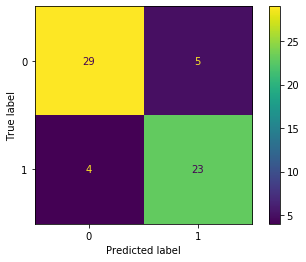

In [35]:
plot_confusion_matrix(xgbmodel,X_test, y_test,values_format='.4g', cmap="viridis")
plt.show()

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        34
           1       0.82      0.85      0.84        27

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



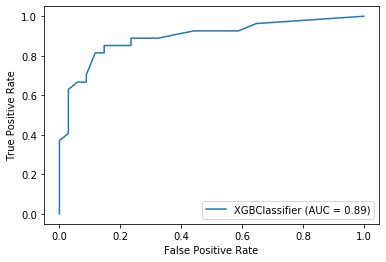

In [37]:
plot_roc_curve(xgbmodel,X_test, y_test)
plt.show()

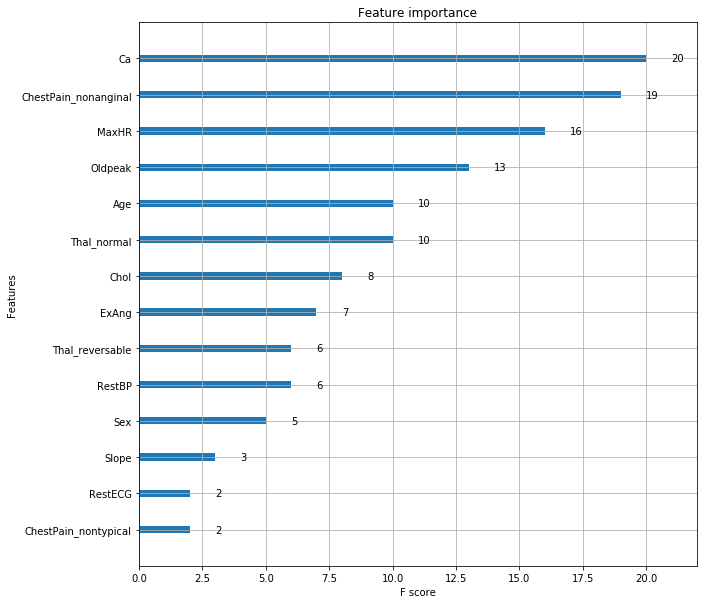

In [38]:
fig, ax = plt.subplots(figsize=(10,10))
plot_importance(xgbmodel,ax=ax)
plt.show()

In [39]:
crossvalid = cross_val_score(xgbmodel,X,y,scoring='accuracy',cv=5)

In [40]:
crossvalid

array([0.8852459 , 0.85      , 0.78333333, 0.78333333, 0.8       ])

In [41]:
crossvalid.mean()

0.8203825136612022